# Notebook Prentrega 2 del Grupo 1

                                    Tema: Defunciones en Argentina

Integrantes del Grupo: - Antonella Arcuri
                       - Daniela Araujo
                       - Maria Candela Herrera
                       - Ana Clara Sanchez
Dataset obtenido de: http://datos.salud.gob.ar/dataset/datos-salud-gob-ar-dataset-defunciones-mensuales-ocurridas-en-la-republica-argentina

Tipo de archivo: csv

Objetivo planteado: abordaremos el dataset de defunciones con el objetivo de obtener información clave sobre las causas mayores de defunción como tambien haremos usos de las herramientas aprendidadas en clase.

In [4]:
# Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [5]:
#Leer archivo del data set
defunciones = pd.read_csv('C:/Users/homea/OneDrive/Documentos/Python Scripts/DATA_SCIENCE/arg_def_15_21.csv')

In [6]:
# Chequeamos que leyó el archivo
defunciones.head()

,region,jurisdiccion,mes_anio_defuncion,mes_def,anio_def,sexo_id,sexo_nombre,grupo_etario,grupo_causa_defuncion_CIE10,cod_causa_muerte_CIE10,cantidad
0,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P21,1
1,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q60,1
2,1.Centro,6.Prov. Bs.As.,08/2015,8,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q24,1
3,1.Centro,6.Prov. Bs.As.,05/2015,5,2015,1,1.Varones,01.menor a 20 anios,1000 ENF SISTEMA RESPIRATORIO,J18,1
4,1.Centro,6.Prov. Bs.As.,10/2015,10,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P36,1


In [7]:
# Revisar tipo de datos en el dataset
defunciones.dtypes

region                         object
jurisdiccion                   object
mes_anio_defuncion             object
mes_def                         int64
anio_def                        int64
sexo_id                         int64
sexo_nombre                    object
grupo_etario                   object
grupo_causa_defuncion_CIE10    object
cod_causa_muerte_CIE10         object
cantidad                        int64
dtype: object

In [8]:
# Chequear cantidad de datos en el dataset
tamaño=defunciones.shape
print("El dataset cuenta con ", tamaño, "siendo el primer campo filas y el segundo columnas")

El dataset cuenta con  (2516784, 11) siendo el primer campo filas y el segundo columnas


In [9]:
#Asigno variable al total de filas y de columnas
num_filas,num_columnas=defunciones.shape
print( f"El dataset tiene {num_filas} filas en total y tiene {num_columnas} columnas")

El dataset tiene 2516784 filas en total y tiene 11 columnas


In [10]:
# Revisar si existen datos faltantes en el dataset
valores_faltantes=defunciones.isnull().sum()
print(valores_faltantes)

# No hay datos faltante

region                         0
jurisdiccion                   0
mes_anio_defuncion             0
mes_def                        0
anio_def                       0
sexo_id                        0
sexo_nombre                    0
grupo_etario                   0
grupo_causa_defuncion_CIE10    0
cod_causa_muerte_CIE10         0
cantidad                       0
dtype: int64


In [11]:
#Datos con NA

defunciones.isna().sum()

region                         0
jurisdiccion                   0
mes_anio_defuncion             0
mes_def                        0
anio_def                       0
sexo_id                        0
sexo_nombre                    0
grupo_etario                   0
grupo_causa_defuncion_CIE10    0
cod_causa_muerte_CIE10         0
cantidad                       0
dtype: int64

In [12]:
# VEEEEEEER RENOMBRAR COLUMNAS X EJ grupo_causa_defuncion_CIE10 

In [13]:
# Filtrar cantidad de datos por año


In [14]:
def_anio=defunciones['anio_def'].value_counts()

In [15]:
print(def_anio)

2021    432242
2020    377592
2016    352506
2017    342344
2019    341057
2018    337600
2015    333443
Name: anio_def, dtype: int64


In [16]:
# Filtrar categorias de la variable jurisdiccion


In [17]:
defunciones['jurisdiccion'].unique()

array(['6.Prov. Bs.As.', '2.CABA', '99.no identificado.', '14.Cordoba.',
       '82.Santa Fe.', '54.Misiones.', '22.Chaco.', '90.Tucuman.',
       '18.Corrientes.', '30.Entre Rios.', '34.Formosa.', '50.Mendoza.'],
      dtype=object)

In [18]:
# ver cantidad de ''99 no identificado' de la variable jurisdiccion por año


In [19]:
juris_99=defunciones[defunciones['jurisdiccion'] == '99.no identificado.']['anio_def'].value_counts()

In [20]:
print(juris_99)

2021    65963
2020    57838
2016    50156
2018    49802
2019    49610
2017    49278
2015    46925
Name: anio_def, dtype: int64


In [21]:
# ver porcentaje de ''99 no identificado' sobre el total de datos de la variable jurisdiccion


In [22]:
porc_99_jurisd=(juris_99/def_anio)*100

In [23]:
print (porc_99_jurisd)

2015    14.072870
2016    14.228410
2017    14.394293
2018    14.751777
2019    14.545956
2020    15.317591
2021    15.260664
Name: anio_def, dtype: float64


In [24]:
porc_99_jurisd.mean()

14.653080333352424

In [25]:
defunciones['grupo_etario'].unique()

array(['01.menor a 20 anios', '05.de 60 a 69 anios',
       '03.de 40 a 49 anios', '02.de 20 a 39 anios',
       '04.de 50 a 59 anios', '07. de 80 anios y mas',
       '06.de 70 a 79 anios', '08.sin especificar'], dtype=object)

In [26]:
defunciones['grupo_etario'].value_counts()

07. de 80 anios y mas    997080
06.de 70 a 79 anios      592922
05.de 60 a 69 anios      416732
04.de 50 a 59 anios      209595
02.de 20 a 39 anios      107111
03.de 40 a 49 anios      103711
01.menor a 20 anios       75626
08.sin especificar        14007
Name: grupo_etario, dtype: int64

In [27]:
etario_08=defunciones[defunciones['grupo_etario'] == '08.sin especificar']['anio_def'].value_counts()

In [28]:
print(etario_08)

2020    2949
2019    2012
2017    1942
2018    1907
2016    1784
2021    1715
2015    1698
Name: anio_def, dtype: int64


In [29]:
# VEEEEEEER
# 1- conviene rangos en int?
# 2- ver binning rangos etarios

In [30]:
defunciones['grupo_causa_defuncion_CIE10'].value_counts()

0900 ENF  DEL SISTEMA CIRCULATORIO                                 692307
0200 T MALIGNOS                                                    429719
1000 ENF SISTEMA RESPIRATORIO                                      427872
0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                        236544
1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS    156731
1700 CAUSAS EXTERNAS                                               129363
1800 DEMAS CAUSAS DEFINIDAS                                        123220
1300 ENF  DEL SISTEMA URINARIO                                      92111
0300 DIABETES MELLITUS                                              65723
1200 ENF  DEL HIGADO                                                40021
1500 AFECC  PERINATALES                                             21169
0299 C IN SITU, TUM BEN  Y COMP INCIERTO                            19502
0800 TRASTORNOS MENTALES Y DEL COMP                                 18839
0500 TRAST METABOLICOS                

In [31]:
#VEEEER Graficos

In [32]:
# Daniela: label encoder region
#  graficos causas por edad

In [33]:
print (defunciones.grupo_etario.min)
print (defunciones.grupo_etario.max)

<bound method NDFrame._add_numeric_operations.<locals>.min of 0          01.menor a 20 anios
1          01.menor a 20 anios
2          01.menor a 20 anios
3          01.menor a 20 anios
4          01.menor a 20 anios
                  ...         
2516779    01.menor a 20 anios
2516780    01.menor a 20 anios
2516781    01.menor a 20 anios
2516782    01.menor a 20 anios
2516783    01.menor a 20 anios
Name: grupo_etario, Length: 2516784, dtype: object>
<bound method NDFrame._add_numeric_operations.<locals>.max of 0          01.menor a 20 anios
1          01.menor a 20 anios
2          01.menor a 20 anios
3          01.menor a 20 anios
4          01.menor a 20 anios
                  ...         
2516779    01.menor a 20 anios
2516780    01.menor a 20 anios
2516781    01.menor a 20 anios
2516782    01.menor a 20 anios
2516783    01.menor a 20 anios
Name: grupo_etario, Length: 2516784, dtype: object>


In [34]:
#eliminacion de numeros en causas

In [37]:
defunciones['causas']= defunciones.grupo_causa_defuncion_CIE10.str.extract('([a-zA-Z  ]+)')

In [38]:
defunciones.head()

,region,jurisdiccion,mes_anio_defuncion,mes_def,anio_def,sexo_id,sexo_nombre,grupo_etario,grupo_causa_defuncion_CIE10,cod_causa_muerte_CIE10,cantidad,causas
0,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P21,1,AFECC PERINATALES
1,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q60,1,MALFORM CONGENITAS
2,1.Centro,6.Prov. Bs.As.,08/2015,8,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q24,1,MALFORM CONGENITAS
3,1.Centro,6.Prov. Bs.As.,05/2015,5,2015,1,1.Varones,01.menor a 20 anios,1000 ENF SISTEMA RESPIRATORIO,J18,1,ENF SISTEMA RESPIRATORIO
4,1.Centro,6.Prov. Bs.As.,10/2015,10,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P36,1,AFECC PERINATALES


In [39]:
#grafico de mayores causas

In [40]:
conteo_causas = defunciones['causas'].value_counts()

In [41]:
causas_mayores = conteo_causas.head(10)

In [42]:
print(causas_mayores)

 ENF  DEL SISTEMA CIRCULATORIO             692307
 T MALIGNOS                                429719
 ENF SISTEMA RESPIRATORIO                  427872
 CIERTAS ENF INFECCIOSAS Y PARASITARIAS    236544
 SIGNOS                                    156731
 CAUSAS EXTERNAS                           129363
 DEMAS CAUSAS DEFINIDAS                    123220
 ENF  DEL SISTEMA URINARIO                  92111
 DIABETES MELLITUS                          65723
 ENF  DEL HIGADO                            40021
Name: causas, dtype: int64


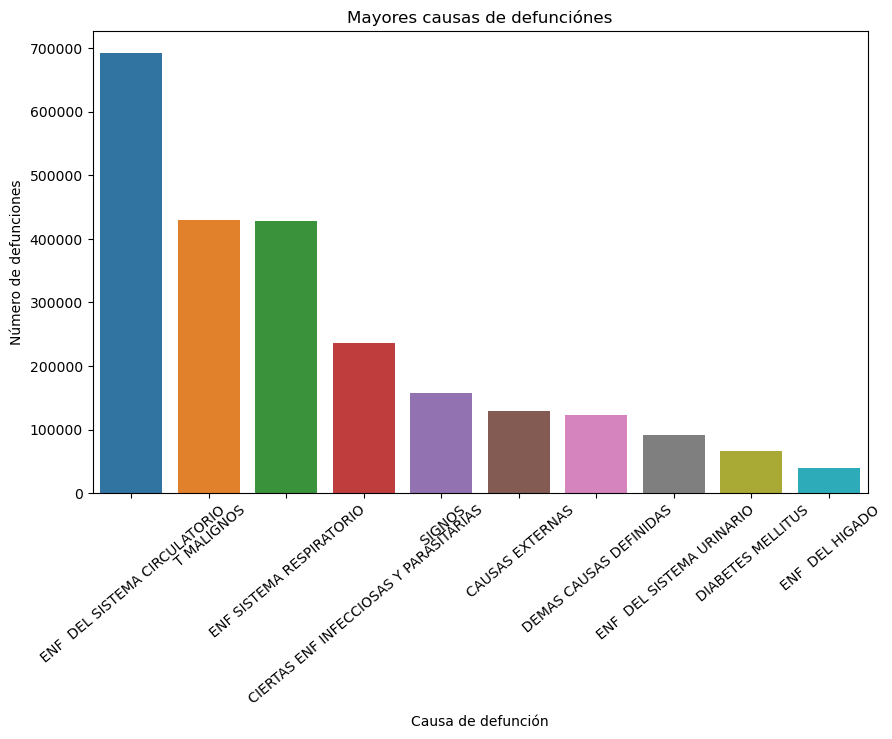

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=causas_mayores.index, y=causas_mayores.values)
plt.xlabel("Causa de defunción")
plt.ylabel("Número de defunciones")
plt.title("Mayores causas de defunciónes")
plt.xticks(rotation=40)
plt.show()

In [37]:
#label_enconder

In [38]:
encoder = LabelEncoder()

In [39]:
defunciones['region_encod'] = encoder.fit_transform(defunciones['region'])

In [40]:
print(defunciones[['region', 'region_encod']].head())

     region  region_encod
0  1.Centro             0
1  1.Centro             0
2  1.Centro             0
3  1.Centro             0
4  1.Centro             0


In [45]:
# Cande: graficos distribución de datos, (outliers?)
#¿Hay correlación entre features?


In [46]:
# Clara: armar repo 
# renombrar columna, 
# minimos y maximos de causas, años, sexo, ragos etarios, region
#graficos de analisis de causas en gral y causas por region (categorías principales?)

#PREGUNTAR: Analisis de correlacion entre variables?
#Redactar conclusión?